<a href="https://colab.research.google.com/github/phtay2011/eth_development/blob/main/Image_Generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Setup

from IPython.utils import io
with io.capture_output() as captured:
  !pip install torch==1.9.0+cu102 torchvision==0.10.0+cu102 -f https://download.pytorch.org/whl/torch/ -f https://download.pytorch.org/whl/torchvision/
  !git clone https://github.com/openai/CLIP
  # !pip install taming-transformers
  !git clone https://github.com/CompVis/taming-transformers.git
  !rm -Rf clipit
  !git clone https://github.com/mfrashad/clipit.git
  !pip install ftfy regex tqdm omegaconf pytorch-lightning
  !pip install kornia
  !pip install imageio-ffmpeg   
  !pip install einops
  !pip install torch-optimizer
  !pip install easydict
  !pip install braceexpand
  !pip install git+https://github.com/pvigier/perlin-numpy

  # ClipDraw deps
  !pip install svgwrite
  !pip install svgpathtools
  !pip install cssutils
  !pip install numba
  !pip install torch-tools
  !pip install visdom

  !pip install gradio

  !git clone https://github.com/BachiLi/diffvg
  %cd diffvg
  # !ls
  !git submodule update --init --recursive
  !python setup.py install
  %cd ..
  
  !mkdir -p steps
  !mkdir -p models

# VQGAN + CLIP

In [2]:
import sys
sys.path.append("clipit")

Working with z of shape (1, 256, 16, 16) = 65536 dimensions.


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

8.19kB [00:00, 415kB/s]                    


loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth
VQLPIPSWithDiscriminator running with hinge loss.
Restored from models/vqgan_imagenet_f16_16384.ckpt


100%|████████████████████████████████████████| 338M/338M [00:03<00:00, 113MiB/s]
100%|████████████████████████████████████████| 335M/335M [00:03<00:00, 115MiB/s]


Using device: cuda:0
Optimising using: Adam
Using text prompts: ['pile of shit splashing out']
Using seed: 10734283860834389442


0it [00:00, ?it/s]

iter: 0, loss: 1.80089, losses: 0.895493, 0.905395


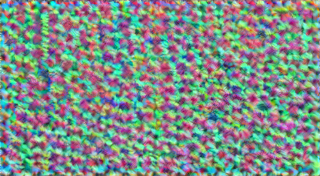

In [ ]:
import clipit
# To reset settings to default
clipit.reset_settings()
# You can use "|" to separate multiple prompts
prompts = "pile of shit splashing out"
# You can trade off speed for quality: draft, normal, better, best
quality = "normal"
# Style: image', 'painting','pixel art
style = 'image'
# Aspect ratio: widescreen, square, portrait
aspect = "widescreen"
# Add settings
clipit.add_settings(prompts=prompts, quality=quality, aspect=aspect)
# Apply these settings and run
settings = clipit.apply_settings()
clipit.do_init(settings)
clipit.do_run(settings)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')